# $6^{th}$ excercises

## Notebook setup

#### Used libraries

In [18]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

#### Functions

In [39]:
def PlotSetup():
    plt.axes().set_facecolor(bg1)
    plt.grid(alpha=0.3)

def MultiplotSetup(fig,r,c):
    for i in range(r*c):
        plt.subplot(r,c,i+1)
        fig.axes[i].set_facecolor(bg1)
        plt.grid(alpha=0.3) 
    
def Legend():
    leg = plt.legend(facecolor=bg2)
    for text in leg.get_texts():
        text.set_color(el1)
        
def Errbar1Sigma(x,y,e):
    plt.vlines(x,y-e,y+e,color=er1,alpha=0.8, label="$1\sigma$")
    plt.plot(x,y,color=el1)
    
def Errbar2Sigma(x,y,e):
    plt.vlines(x,y-e,y+e,color=er1,alpha=0.8, label="$1\sigma$")
    plt.vlines(x,y-2*e,y+2*e,color=er2,alpha=0.4, label="$2\sigma$")
    plt.plot(x,y,color=el1)

#### Colors

In [20]:
#background
bg1 = "#191724" 
bg2 = "#26233a" 
#elements
el1 = "#e0def4" 
el2 = "#f6c177" 
el3 = "#eb6f92" 
el4 = "#9ccfd8"
#errorbars
er1 = "#908caa"  
er2 = "#6e6a86"

## 06.1 - 1D Ising model
### Introductory notes
A typical experimental situation is that of a system at fixed temperature. The canonical ensamble corresponds exactly to this situation. To find its probability density we do the following observation: if temperature is fixed there must be a much larger system at fixed temperature, the reservoire, that exchange energy with the system described as a canonical ensamble. As a whole we are dealing with a microcanonical ensambe. The energy of our system is small compared to that of the reservoire, so developing the logarithm of the reservoire pdf we get
\begin{equation}
p(x)=\frac{e^{\beta H(x)}}{Z(N,V,T)} 
\end{equation}

where $x$ is a point of the phase space. How can we sample this pdf whithout knowing the partition function? Metropolis algorithm comes in our help, since there normalization constants cancel out!

We whish to apply these concept to the 1D Ising model, that is one of the few statistical mechanic models exactly solvable. It was firstly formulated to describe the ferromagnetic phase transition in materials. It turned out to be so general that it is still used in a variety of problems. It is based, in its 1d version, on the following assumpitons:
- we are working with a lattice of spins, objects whose value can only be $\pm 1$ (up or down)
- only adjacent spins can interact
- spins can interact with an external field

The Hamiltonian of this model for $N$ spins assumes the following form
\begin{equation}
H(\sigma_1\dots\sigma_N)=-J\sum_{\langle i,j \rangle}^N \sigma_i\sigma_j - h \sum_i^N \sigma_i
\end{equation}
Where $J$ is the coupling constant and $h$ the external field. Clearly, the Maxwell-Boltzman pdf is maximized if $\sigma_i\sigma_j$ has the same sign of $J$ and if $\sigma_i$ has the same sign of h, that is: spins tend to align with $h$ and, if $J$ is positive, to be parallel. 

#### Metropolis
Let's call $\mu$ a particular spin configuration. We use metropolis with the symmetric transistion $T(\mu'|\mu)=$"changing one of the spins randomly". Being $p$ in the form of an exponential and having only two possible values for each spin the acceptance rate boils down to

\begin{equation}
A(\mu'|\mu)=min(1,e^{-2\beta s_k(J(s_{k-1}+s_{k+1})+h)})
\end{equation}


#### Gibbs
Gibbs sampling is a particular case of metropolis sampling in wich we choose a transition probability whose proposed moves are always accepted. The algorithm itself is simple: 
1. we choose a starting point $(x_0\dots x_n)$ 
2. then we repeate the following: for each $x_i$ we produce a new coordinate $x'_i$ from the conditional distribution where all the other coordinates are kept fixed.

When applying this metod to the Ising model, using the definition of conditional probability and expanding the integral in the marginal as a sum of two pdf, one with $\sigma_i=+1$ and the other with $\sigma_i=-1$ we get the nice expression:

\begin{equation}
    p(s'_i=\pm|\{s_j, j\neq i\})=\frac{1}{1+e^{\mp 2\beta J\sum_{\langle i,j \rangle}^N s_j}}
\end{equation}


### Excercise goal
**Goal:** Evaluate $U(N,T,h)$, $C(N,T,h)$, $\chi(N,T,h)$ for $h=0$ and $M(N,T,h)$ for $h=0.02$, with $N=50$, $J=1$ and $T\in[0.5,2]$, using Metropolis and Gibbs algorithm.

**Expectations:** We expect the data obtained through simulation to almost exactly follow the analitical solution

### Implementation Notes
The C++ programs perform the simulation for fixed T using datablocking. A python script (`061.py`) runs the simulations with the selected sampling algorithm and the selected value of h, automatically changing T 50 times and saving the results of each simulation. We decided to add a function that performs equilibration and the possibility to specify equilibration time in the input file  - that function just runs the simulation for the number of steps indicated in the input file without updating any average. By doing it this way, the integration of the C++ program with the python script is straightforward.

The proposed implementation for $\chi$ is only valid at $h=0$ where $\langle M \rangle =0$. This had to be superimposed because in the simulation it would have never been exactly zero, introducing an error.

### Equilibration

We are trying to simulate the sistem at equilibrium, but the choosen starting point will almost always be out of the equilibrium (in this case we decided to start at $T=\infty$, that means completly random spins). So we must find a time after which we are sure our system has reached equilibrium and only then start the actual simulation, in order for the estimation of relevant quantities not to be affected by the values taken in the out-of-equilibrium phase. To do so, we are going to plot a relevant quantity and see when it reaches a stable value.

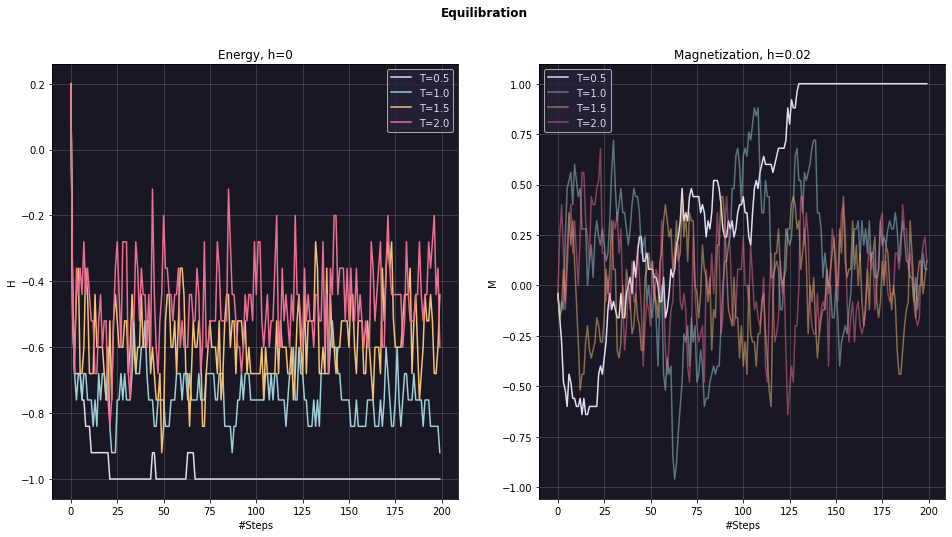

In [46]:
fig=plt.figure(figsize=(16, 8))
MultiplotSetup(fig,1,2)
plt.suptitle("Equilibration", weight='bold')

npoints=200
x=np.arange(0,npoints)

plt.subplot(121)
plt.title("Energy, h=0")
plt.xlabel('#Steps')
plt.ylabel('H')

y=np.loadtxt("store/061-equi_ene0.5", usecols=(0), unpack=True )
plt.plot(x,y[:npoints], c=el1, label="T=0.5")

y=np.loadtxt("store/061-equi_ene1", usecols=(0), unpack=True )
plt.plot(x,y[:npoints], c=el4, label="T=1.0")

y=np.loadtxt("store/061-equi_ene1.5", usecols=(0), unpack=True )
plt.plot(x,y[:npoints], c=el2, label="T=1.5")

y=np.loadtxt("store/061-equi_ene2", usecols=(0), unpack=True )
plt.plot(x,y[:npoints], c=el3, label="T=2.0")

Legend()

plt.subplot(122)
plt.title("Magnetization, h=0.02")
plt.xlabel('#Steps')
plt.ylabel('M')

y=np.loadtxt("store/061-equi_mag0.5", usecols=(0), unpack=True )
plt.plot(x,y[:npoints], c=el1, label="T=0.5")

y=np.loadtxt("store/061-equi_mag1", usecols=(0), unpack=True )
plt.plot(x,y[:npoints], c=el4, label="T=1.0", alpha=0.5)

y=np.loadtxt("store/061-equi_mag1.5", usecols=(0), unpack=True )
plt.plot(x,y[:npoints], c=el2, label="T=1.5", alpha=0.5)

y=np.loadtxt("store/061-equi_mag2", usecols=(0), unpack=True )
plt.plot(x,y[:npoints], c=el3, label="T=2.0", alpha=0.5)

Legend()

plt.show()

As we could have expected the lower the temperature, the longer the equilibration. Magnetization shows us that at $T=0.5$ it takes almost 130 steps to reach equilibrium. Since the program takes a negliable amount of time to perform such a number of steps, we decided to fix the equilibration phase lenght to 150 teps.

### Results
For each simulation we used 20 blocks of 10000 steps each and an equilibration time of 150 steps.

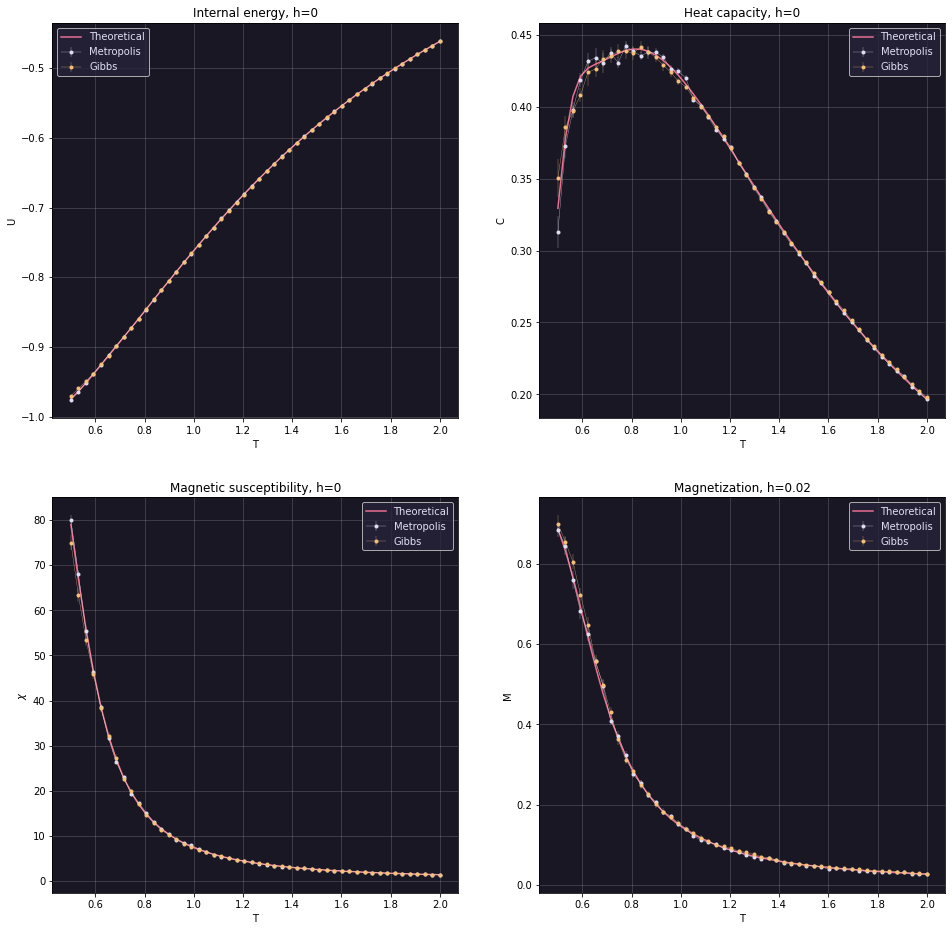

In [52]:
points=50
T = np.linspace(0.5,2.,points)

##theorical quantities
beta = 1/T
b=beta
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

ene = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

h=0.02
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns

mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)



fig=plt.figure(figsize=(16,16))

#Internal energy
plt.subplot(221)
fig.axes[0].set_facecolor(bg1)
plt.title('Internal energy, h=0')
plt.xlabel('T')
plt.ylabel('U')

ym,em = np.loadtxt("store/061-mrt2_ene-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_ene-h=0.0", usecols=(2,3), unpack=True)

plt.errorbar(T,ym, yerr=em,linewidth = 0.3, marker = '.',color=el1, label='Metropolis')
plt.errorbar(T,yg, yerr=eg,linewidth = 0.3, marker = '.',color=el2, label='Gibbs')
plt.plot(T,ene, c=el3, label="Theoretical")

Legend()
plt.grid(alpha=0.3)


#Heat capacity
plt.subplot(222)
fig.axes[1].set_facecolor(bg1)
plt.title('Heat capacity, h=0')
plt.xlabel('T')
plt.ylabel('C')

ym,em = np.loadtxt("store/061-mrt2_heat-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_heat-h=0.0", usecols=(2,3), unpack=True)

plt.errorbar(T,ym, yerr=em,linewidth = 0.3, marker = '.',color=el1, label='Metropolis')
plt.errorbar(T,yg, yerr=eg,linewidth = 0.3, marker = '.',color=el2, label='Gibbs')
plt.plot(T,heat, c=el3, label="Theoretical")

Legend()
plt.grid(alpha=0.3)


#Magnetic susceptibility
plt.subplot(223)
fig.axes[2].set_facecolor(bg1)
plt.title('Magnetic susceptibility, h=0')
plt.xlabel('T')
plt.ylabel('$\chi$')

ym,em = np.loadtxt("store/061-mrt2_chi-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_chi-h=0.0", usecols=(2,3), unpack=True)

plt.errorbar(T,ym, yerr=em,linewidth = 0.3, marker = '.',color=el1, label='Metropolis')
plt.errorbar(T,yg, yerr=eg,linewidth = 0.3, marker = '.',color=el2, label='Gibbs')
plt.plot(T,chi, c=el3, label="Theoretical")

Legend()
plt.grid(alpha=0.3)


#Magnetization
plt.subplot(224)
fig.axes[3].set_facecolor(bg1)
plt.title('Magnetization, h=0.02')
plt.xlabel('T')
plt.ylabel('M')

ym,em = np.loadtxt("store/061-mrt2_mag-h=0.02", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_mag-h=0.02", usecols=(2,3), unpack=True)

plt.errorbar(T,ym, yerr=em,linewidth = 0.3, marker = '.',color=el1, label='Metropolis')
plt.errorbar(T,yg, yerr=eg,linewidth = 0.3, marker = '.',color=el2, label='Gibbs')
plt.plot(T,mag, c=el3, label="Theoretical")

Legend()
plt.grid(alpha=0.3)


plt.show()

It seems that there isn't any relevant difference between metropolis and gibbs samplings and theoretical values. We can go into more detail by plotting the relative difference of quantities evaluated by means of our algorithm with the theoretical values:

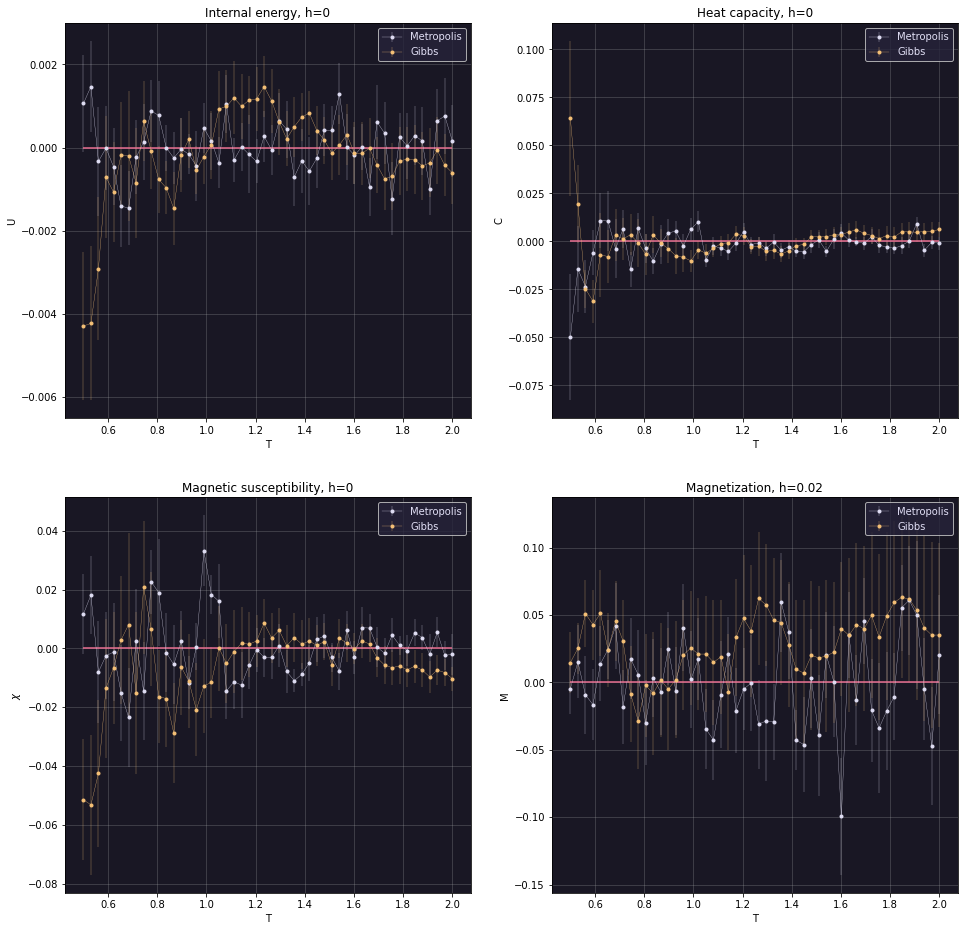

In [53]:
points=50
T = np.linspace(0.5,2.,points)

##theorical quantities
beta = 1/T
b=beta
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

ene = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

h=0.02
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns

mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)



fig=plt.figure(figsize=(16,16))

#Internal energy
plt.subplot(221)
fig.axes[0].set_facecolor(bg1)
plt.title('Internal energy, h=0')
plt.xlabel('T')
plt.ylabel('U')

ym,em = np.loadtxt("store/061-mrt2_ene-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_ene-h=0.0", usecols=(2,3), unpack=True)
ym=(ym-ene)/ene
yg=(yg-ene)/ene
em=em/ene
eg=eg/ene

plt.errorbar(T,ym, yerr=em,linewidth = 0.3, marker = '.',color=el1, label='Metropolis')
plt.errorbar(T,yg, yerr=eg,linewidth = 0.3, marker = '.',color=el2, label='Gibbs')
plt.hlines(0, 0.5,2,color=el3)

Legend()
plt.grid(alpha=0.3)


#Heat capacity
plt.subplot(222)
fig.axes[1].set_facecolor(bg1)
plt.title('Heat capacity, h=0')
plt.xlabel('T')
plt.ylabel('C')

ym,em = np.loadtxt("store/061-mrt2_heat-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_heat-h=0.0", usecols=(2,3), unpack=True)
ym=(ym-heat)/heat
yg=(yg-heat)/heat
em=em/heat
eg=eg/heat

plt.errorbar(T,ym, yerr=em,linewidth = 0.3, marker = '.',color=el1, label='Metropolis')
plt.errorbar(T,yg, yerr=eg,linewidth = 0.3, marker = '.',color=el2, label='Gibbs')
plt.hlines(0, 0.5,2,color=el3)

Legend()
plt.grid(alpha=0.3)


#Magnetic susceptibility
plt.subplot(223)
fig.axes[2].set_facecolor(bg1)
plt.title('Magnetic susceptibility, h=0')
plt.xlabel('T')
plt.ylabel('$\chi$')

ym,em = np.loadtxt("store/061-mrt2_chi-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_chi-h=0.0", usecols=(2,3), unpack=True)
ym=(ym-chi)/chi
yg=(yg-chi)/chi
em=em/chi
eg=eg/chi

plt.errorbar(T,ym, yerr=em,linewidth = 0.3, marker = '.',color=el1, label='Metropolis')
plt.errorbar(T,yg, yerr=eg,linewidth = 0.3, marker = '.',color=el2, label='Gibbs')
plt.hlines(0, 0.5,2,color=el3)

Legend()
plt.grid(alpha=0.3)


#Magnetization
plt.subplot(224)
fig.axes[3].set_facecolor(bg1)
plt.title('Magnetization, h=0.02')
plt.xlabel('T')
plt.ylabel('M')

ym,em = np.loadtxt("store/061-mrt2_mag-h=0.02", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_mag-h=0.02", usecols=(2,3), unpack=True)
ym=(ym-mag)/mag
yg=(yg-mag)/mag
em=em/mag
eg=eg/mag

plt.errorbar(T,ym, yerr=em,linewidth = 0.3, marker = '.',color=el1, label='Metropolis')
plt.errorbar(T,yg, yerr=eg,linewidth = 0.3, marker = '.',color=el2, label='Gibbs')
plt.hlines(0, 0.5,2,color=el3)

Legend()
plt.grid(alpha=0.3)


plt.show()


Effectively, both metropolis and gibbs sampling gives values compatible with the theoretical ones. 